In [1]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
import glob
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


### Getting first 20 Folder Names

In [10]:
fldrs = glob.glob('train-images/*')
flds = []
for i in fldrs[:20]:
    flds.append(i.split('\\')[1])
    
print(flds)

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat']


## Data Cleaning and Preparation
* Testing set preparation

In [7]:
folders = glob.glob('images/*')

In [ ]:
for i in folders: 
    dir = i.split('\\')[1]
    parent_dir = "images"
    path = os.path.join(parent_dir, dir)  
    os.mkdir(path) 
    
print(" %d Directories created" %len(folders)) 

In [ ]:
import random
import shutil
paths = 'images/'
for i in os.listdir(paths):
    l = len(os.listdir(paths+i))
    rand_paths = random.sample(os.listdir(paths+i), int(l/10))
    for j in (rand_paths):
        src = 'images/'+i+'/'+j
        dest = 'test-images/'+i+'/'+j
        print(dest)
        shutil.move(src, dest, copy_function = shutil.copytree)
    


## Data Augmentation & Generators generation

In [82]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.2,height_shift_range=0.1,
                              rescale=1/255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                              fill_mode='nearest')

In [84]:
image_gen.flow_from_directory('C:\\Users\\vsneh\\Udemy-notebooks\\bird-species-detection\\train-images')
image_gen.flow_from_directory('C:\\Users\\vsneh\\Udemy-notebooks\\bird-species-detection\\test-images')

Found 10585 images belonging to 199 classes.
Found 1137 images belonging to 199 classes.


## Model Designing and Training

In [103]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(199))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

image_shape = (150,150,3)

In [104]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [95]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('./train-images',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_image_gen = image_gen.flow_from_directory('./test-images',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 10585 images belonging to 199 classes.
Found 1137 images belonging to 199 classes.


In [96]:
train_image_gen.class_indices

{'001.Black_footed_Albatross': 0,
 '002.Laysan_Albatross': 1,
 '003.Sooty_Albatross': 2,
 '004.Groove_billed_Ani': 3,
 '005.Crested_Auklet': 4,
 '006.Least_Auklet': 5,
 '007.Parakeet_Auklet': 6,
 '008.Rhinoceros_Auklet': 7,
 '009.Brewer_Blackbird': 8,
 '010.Red_winged_Blackbird': 9,
 '011.Rusty_Blackbird': 10,
 '012.Yellow_headed_Blackbird': 11,
 '013.Bobolink': 12,
 '014.Indigo_Bunting': 13,
 '015.Lazuli_Bunting': 14,
 '016.Painted_Bunting': 15,
 '017.Cardinal': 16,
 '018.Spotted_Catbird': 17,
 '019.Gray_Catbird': 18,
 '020.Yellow_breasted_Chat': 19,
 '021.Eastern_Towhee': 20,
 '022.Chuck_will_Widow': 21,
 '023.Brandt_Cormorant': 22,
 '024.Red_faced_Cormorant': 23,
 '025.Pelagic_Cormorant': 24,
 '026.Bronzed_Cowbird': 25,
 '027.Shiny_Cowbird': 26,
 '028.Brown_Creeper': 27,
 '029.American_Crow': 28,
 '030.Fish_Crow': 29,
 '031.Black_billed_Cuckoo': 30,
 '032.Mangrove_Cuckoo': 31,
 '033.Yellow_billed_Cuckoo': 32,
 '034.Gray_crowned_Rosy_Finch': 33,
 '035.Purple_Finch': 34,
 '036.Norther

In [97]:
import warnings
import PIL.Image
warnings.filterwarnings('ignore')

In [109]:
steps_per_epoch = train_image_gen.n//train_image_gen.batch_size
validation_steps = test_image_gen.n//test_image_gen.batch_size

results = model.fit_generator(train_image_gen,
                              epochs=15,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=test_image_gen,
                              validation_steps=validation_steps)

Epoch 1/15
661/661 [==============================] - 220s 333ms/step - loss: 5.2946 - accuracy: 0.0039 - val_loss: 5.2904 - val_accuracy: 0.0053
Epoch 2/15
661/661 [==============================] - 219s 331ms/step - loss: 5.2941 - accuracy: 0.0031 - val_loss: 5.2984 - val_accuracy: 0.0054
Epoch 3/15
661/661 [==============================] - 220s 333ms/step - loss: 5.2940 - accuracy: 0.0029 - val_loss: 5.2926 - val_accuracy: 0.0054
Epoch 4/15
661/661 [==============================] - 1249s 2s/step - loss: 5.2940 - accuracy: 0.0039 - val_loss: 5.2882 - val_accuracy: 0.0054
Epoch 5/15
661/661 [==============================] - 223s 337ms/step - loss: 5.2938 - accuracy: 0.0031 - val_loss: 5.2938 - val_accuracy: 0.0054
Epoch 6/15
661/661 [==============================] - 222s 336ms/step - loss: 5.2938 - accuracy: 0.0029 - val_loss: 5.2840 - val_accuracy: 0.0054
Epoch 7/15
661/661 [==============================] - 222s 336ms/step - loss: 5.2937 - accuracy: 0.0030 - val_loss: 5.2999 - v

In [110]:
predictions = model.predict_generator(test_image_gen,steps=validation_steps)

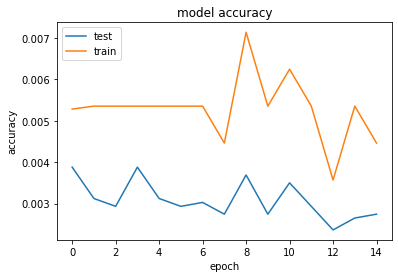

In [111]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.savefig('Birds-Model-1 Epoch')
plt.show()

In [112]:
model.save('birds-1-epochs.h5')

### For Testing Normal Model

In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

img = 'test-images/002.Laysan_Albatross/Laysan_Albatross_0034_628.jpg'
img = image.load_img(img,target_size=(150,150))
img = image.img_to_array(img)
img = img/255

model = load_model('models/birds-1-epochs.h5')
prediction = model.predict(img.reshape(1,150,150,3))
# print(prediction)
print("Image has:",fldrs[np.argmax(prediction)].split('\\')[1])

Image has: 160.Black_throated_Blue_Warbler


### For Testing Teachable Machine Model

In [14]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np


# Load the model
model = tensorflow.keras.models.load_model('models/TchMach_model.h5')

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

image = Image.open('C:\\Users\\vsneh\\Udemy-notebooks\\bird-species-detection\\test-images\\009.Brewer_Blackbird\\Brewer_Blackbird_0027_2329.jpg')

size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

image_array = np.asarray(image)

image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

data[0] = normalized_image_array

prediction = model.predict(data)
print(flds[np.argmax(prediction)])


009.Brewer_Blackbird


In [12]:
import jovian


<IPython.core.display.Javascript object>

[jovian] Update Available: 0.2.26 --> 0.2.29
[jovian] Run `!pip install jovian --upgrade` to upgrade


In [13]:
jovian.commit(environment='None')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "v-snehith999/training-cnn" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/v-snehith999/training-cnn


'https://jovian.ml/v-snehith999/training-cnn'